In [2]:
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from sodapy import Socrata
import geopandas as gpd

Pulling the COPA police complaints data set by complainant. Using the Socrata API through the Chicago Open Data Portal

In [4]:
client = Socrata("data.cityofchicago.org", 'EjrjYzG6YAkBx7bPBzME8jD4c')
results = client.get("w3hi-cfa4",limit = 500000)

complaints = pd.DataFrame.from_records(results)



In [8]:
test = complaints.drop(['age_of_complainant','assignment','case_type','complaint_month','complaint_day','complaint_hour',
                'current_status','finding_code','police_shooting','sex_of_complainant'],axis=1)

In [9]:
test.head()

,beat,complaint_date,current_category,log_no,race_of_complainant
0,131,2017-08-23T15:09:11.000,Excessive Force,1086449,African American / Black
1,1821,2008-11-09T16:55:27.000,Verbal Abuse,1021567,African American / Black
2,712,2009-12-07T19:18:01.000,OC Discharge,1032357,African American / Black
3,1613,2014-07-09T15:08:16.000,Firearm Discharge at Animal,1070242,NaN
4,726,2011-07-12T20:49:37.000,Excessive Force,1046883,African American / Black


In [23]:
for index, row in test.head().iterrows():
    #print (index)
    print (row[4])

African American / Black
African American / Black
African American / Black
nan
African American / Black


In [13]:
test.log_no[2]

'1032357'

In [44]:
complaints.loc[complaints['log_no'] == '1087829']


,age_of_complainant,assignment,beat,case_type,complaint_date,complaint_day,complaint_hour,complaint_month,current_category,current_status,finding_code,log_no,police_shooting,race_of_complainant,sex_of_complainant
82422,40-49,COPA,1923,Complaint,2017-12-15T11:56:55.000,6,11,12,Civil Suits,Closed,No Finding,1087829,No,White,Male


In [6]:
#Extracting Year from the datetime of the complaint
complaints.complaint_date
complaints['complaint_date'] =  pd.to_datetime(complaints['complaint_date'], format='%Y%m%dT%H:%M:%S.%f')
complaints['complaint_year'] = complaints.complaint_date.dt.year
complaints['complaint_year'].value_counts()

2009    10837
2010    10334
2008    10290
2011     9204
2012     8702
2013     7911
2014     6580
2015     5623
2016     4891
2017     4458
2007     3220
2018      380
Name: complaint_year, dtype: int64

When looking at which complaints are most numerous, Excessive Force and Taser Notification are the highest counts. 

In [7]:
complaints['current_category'].value_counts()

Excessive Force                  10653
Taser Notification                4862
Miscellaneous                     3519
Verbal Abuse                      1786
Unnecessary Display of Weapon     1722
Civil Suits                        743
Firearm Discharge at Animal        717
Domestic Violence                  665
Firearm Discharge - Hits           513
OC Discharge                       482
Firearm Discharge - No Hits        410
Death or Injury In Custody         390
Search or Seizure                  217
Coercion                           161
Taser Discharge                    138
Operational Violation              110
Motor Vehicle Related Death         55
Legal Violation                     24
Bias                                 8
Unlawful Denial of Counsel           2
Name: current_category, dtype: int64

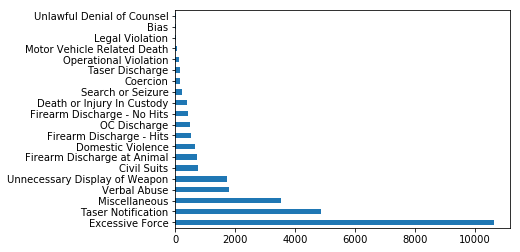

In [8]:
complaints['current_category'].value_counts()[:20].plot(kind='barh')
plt.show()


Next I wanted to look at the racial distribution of complaints and found that it was disproportionately African American / Black

In [9]:
complaints['race_of_complainant'].value_counts()

African American / Black             18395
Hispanic                              3753
White                                 2703
Unknown                                745
Asian or Pacific Islander              149
American Indian or Alaskan Native       26
Name: race_of_complainant, dtype: int64

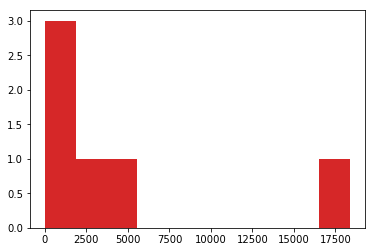

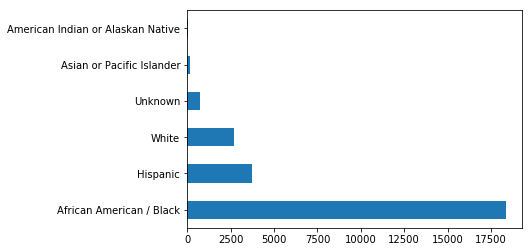

In [175]:
complaints['race_of_complainant'].value_counts()[:20].plot(kind='barh')
plt.show()

The gender breakdown is also disproportionately Male

In [10]:
complaints['sex_of_complainant'].value_counts()

Male       18519
Female      7021
Unknown      231
Name: sex_of_complainant, dtype: int64

Here I was looking to see if there were some beats with more complaints. This is where I noticed that the beats were listed with their District and their Sector (last two digits). This also revealed this files combines multiple Beats if there multiple beats complained about

In [11]:
complaints['beat'].value_counts()

1134                     363
621                      318
2515                     301
624                      298
3100                     297
713                      295
531                      280
0                        252
1112                     248
823                      225
1011                     222
423                      221
1533                     213
321                      212
512                      210
511                      200
421                      199
1121                     197
811                      191
1122                     189
2211                     187
1531                     185
712                      184
1513                     183
612                      179
725                      178
1024                     177
1522                     175
735                      174
523                      170
                        ... 
522 | 2233                 1
1134 | 1223                1
411 | 324                  1
822 | 823     

Looking at just the District we see there are certain districts that have more offenses, but no district is outstanding.

In [12]:
complaints['beat'].str[:-2].value_counts()

11                  2252
7                   2106
6                   1908
8                   1814
4                   1557
5                   1448
25                  1405
15                  1396
3                   1327
10                  1301
9                   1241
22                   958
18                   815
2                    807
16                   739
1                    612
14                   608
24                   594
19                   570
12                   523
17                   440
31                   297
20                   267
13                   266
                     252
23                   230
21                   184
41                    39
1134 | 11             36
621 | 6               34
                    ... 
1731 | 17              1
1134 | 10              1
331 | 2                1
1723 | 25              1
1033 | 5               1
1712 | 1722 | 16       1
225 | 5                1
1134 | 13              1
2221 | 22              1


I pulled the dataset broken out by offending officer to see if there is improved beat information

In [13]:
results2 = client.get("wgde-k5wx", limit=500000)
officers = pd.DataFrame.from_records(results)
officers



,age_of_complainant,assignment,beat,case_type,complaint_date,complaint_day,complaint_hour,complaint_month,current_category,current_status,finding_code,log_no,police_shooting,race_of_complainant,sex_of_complainant
0,20-29,IPRA,131,Complaint,2017-08-23T15:09:11.000,4,15,8,Excessive Force,Closed,NO AFFIDAVIT,1086449,No,African American / Black,Male
1,50-59,IPRA,1821,Complaint,2008-11-09T16:55:27.000,1,16,11,Verbal Abuse,Closed,NO AFFIDAVIT,1021567,No,African American / Black,Female
2,20-29,IPRA,712,Notification,2009-12-07T19:18:01.000,2,19,12,OC Discharge,Closed,No Finding,1032357,No,African American / Black,Male
3,NaN,IPRA,1613,Notification,2014-07-09T15:08:16.000,4,15,7,Firearm Discharge at Animal,Closed,No Finding,1070242,No,NaN,NaN
4,50-59,IPRA,726,Complaint,2011-07-12T20:49:37.000,3,20,7,Excessive Force,Closed,NO AFFIDAVIT,1046883,No,African American / Black,Male
5,30-39,IPRA,621,Complaint,2016-09-28T08:54:49.000,4,8,9,Miscellaneous,Closed,No Finding,1082433,No,African American / Black,Male
6,NaN,IPRA,1122,Notification,2012-06-30T23:54:24.000,7,23,6,Firearm Discharge at Animal,Closed,No Finding,1055175,No,NaN,NaN
7,20-29,IPRA,726,Complaint,2010-07-24T16:05:07.000,7,16,7,Unnecessary Display of Weapon,Closed,NOT SUSTAINED,1038330,No,African American / Black,Female
8,30-39,IPRA,1622,Complaint,2014-12-21T05:34:31.000,1,5,12,Domestic Violence,Closed,SUSTAINED,1073055,No,Hispanic,Female
9,50-59,IPRA,1822,Complaint,2016-11-19T16:19:03.000,7,16,11,Miscellaneous,Closed,SUSTAINED,1083063,No,Hispanic,Male


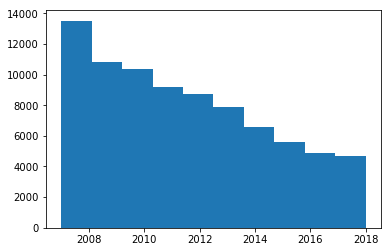

2009    10837
2010    10334
2008    10290
2011     9204
2012     8702
2013     7910
2014     6579
2015     5623
2016     4891
2017     4456
2007     3220
2018      256
Name: complaint_year, dtype: int64

In [146]:
officers['complaint_date'] =  pd.to_datetime(officers['complaint_date'], format='%Y%m%dT%H:%M:%S.%f')
officers['complaint_year'] = officers.complaint_date.dt.year
plt.hist(officers['complaint_year'])
plt.show()
officers['complaint_year'].value_counts()

The officer file also has multiple beats combined together. So for the analysis I will have to separate them

In [148]:
officers.beat.str[:-2].value_counts()

11                  2251
7                   2102
6                   1903
8                   1812
4                   1553
5                   1446
25                  1405
15                  1394
3                   1325
10                  1299
9                   1239
22                   958
18                   815
2                    804
16                   739
1                    609
14                   605
24                   592
19                   567
12                   523
17                   440
31                   295
13                   266
20                   266
                     252
23                   230
21                   184
41                    38
1134 | 11             36
621 | 6               34
                    ... 
1713 | 1722 | 19       1
1822 | 6               1
1312 | 13              1
111 | 131 | 1          1
1431 | 14              1
2515 | 14              1
1333 | 13              1
0 | 21                 1
2124 | 21              1


This is code to split the rows with multiple beats into multiple rows with the same information but with split up beats

In [27]:
complaints.head()

,age_of_complainant,assignment,case_type,complaint_date,complaint_day,complaint_hour,complaint_month,current_category,current_status,finding_code,log_no,police_shooting,race_of_complainant,sex_of_complainant,complaint_year
0,20-29,IPRA,Complaint,2017-08-23 15:09:11,4,15,8,Excessive Force,Closed,NO AFFIDAVIT,1086449,No,African American / Black,Male,2017
1,50-59,IPRA,Complaint,2008-11-09 16:55:27,1,16,11,Verbal Abuse,Closed,NO AFFIDAVIT,1021567,No,African American / Black,Female,2008
2,20-29,IPRA,Notification,2009-12-07 19:18:01,2,19,12,OC Discharge,Closed,No Finding,1032357,No,African American / Black,Male,2009
3,NaN,IPRA,Notification,2014-07-09 15:08:16,4,15,7,Firearm Discharge at Animal,Closed,No Finding,1070242,No,NaN,NaN,2014
4,50-59,IPRA,Complaint,2011-07-12 20:49:37,3,20,7,Excessive Force,Closed,NO AFFIDAVIT,1046883,No,African American / Black,Male,2011


In [29]:
complaints2 = complaints
complaints2
split = complaints2['beat'].str.split('|').apply(pd.Series, 1).stack()
split.index = split.index.droplevel(-1)
split.name = 'beat'
del complaints2['beat']
split = split.apply(lambda x: x.strip())
complaints2 = complaints2.join(split, how ="right")

In [37]:
split.apply(lambda x: x.strip()).value_counts().to_csv('test.csv')

In [40]:
complaints.count()

age_of_complainant     25771
assignment             82430
case_type              27235
complaint_date         82430
complaint_day          82430
complaint_hour         82430
complaint_month        82430
current_category       27177
current_status         27235
finding_code           26098
log_no                 82430
police_shooting        27235
race_of_complainant    25771
sex_of_complainant     25771
dtype: int64

In [41]:
complaints2.count()

age_of_complainant     27163
assignment             28640
case_type              28640
complaint_date         28640
complaint_day          28640
complaint_hour         28640
complaint_month        28640
current_category       28582
current_status         28640
finding_code           27468
log_no                 28640
police_shooting        28640
race_of_complainant    27163
sex_of_complainant     27163
beat                   28640
dtype: int64

In [57]:
#test code for complaints
complaints = pd.DataFrame.from_dict(json_normalize(police), orient='columns')
complaints.race_of_complainants.str.count('African').sum()

657.0